In [1]:
import pandas as pd
import numpy as np
import glob
import os
from PIL import Image

In [2]:
img = glob.glob("/kaggle/input/rice-singal-new/Rice_sin_New/*.jpg")
all_img = []
for l in img:
    k = Image.open(l)
    a = np.array(k)
    all_img.append(a)

In [3]:
all_img[0].shape

(250, 250, 3)

In [4]:
img_lab = []
for t in img:
    k = Image.open(t)
    img_lab.append(os.path.split(t)[-1][:7])

In [5]:
aa = np.array(all_img).reshape(300,-1)

In [6]:
dd = pd.DataFrame(aa)
dd['Target'] = img_lab

In [7]:
dd['Target'][280:288]

280    Karacad
281    Ipsala 
282    basmati
283    Jasmine
284    Jasmine
285    basmati
286    Karacad
287    Arborio
Name: Target, dtype: object

In [8]:
dd = dd.sample(299)

In [9]:
dd = dd.reset_index(drop=True)

In [10]:
x_train = dd.iloc[:,:-1][:250]
y_train = dd.iloc[:,-1][:250]

x_test = dd.iloc[:,:-1][250:]
y_test = dd.iloc[:,-1][250:]

In [11]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,187490,187491,187492,187493,187494,187495,187496,187497,187498,187499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_train.tail(10)

240    Karacad
241    Karacad
242    Karacad
243    Karacad
244    Karacad
245    Karacad
246    Arborio
247    Arborio
248    basmati
249    basmati
Name: Target, dtype: object

In [13]:
x_train.shape

(250, 187500)

In [14]:
x_train_a = np.array(x_train)
x_test_a = np.array(x_test)

In [15]:
x_train_r = x_train_a.reshape(250,250,250,3)
x_test_r = x_test_a.reshape(49,250,250,3)

In [16]:
y_train[180]

'Arborio'

Label 
 Label Id: Jasmine 


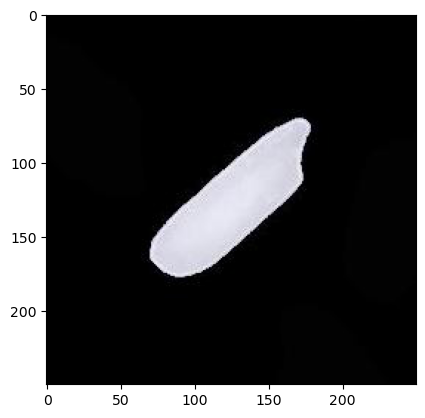

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

i = 193
image = x_train_r[i]
label = y_train[i]
print(f'Label \n Label Id: {label} ')
plt.imshow(image);

In [18]:
from sklearn.preprocessing import LabelBinarizer

enc = LabelBinarizer()

y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

print(y_train.shape)
print(y_test.shape)

(250, 5)
(49, 5)


In [19]:
y_train[193]

array([0, 0, 1, 0, 0])

In [20]:
x_train_r.shape[1:]

(250, 250, 3)

In [21]:
from tensorflow.keras import models, layers, optimizers

In [22]:
batch_size = None
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), padding='same', activation="relu", input_shape=x_train_r.shape[1:]))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), padding='same', activation="relu"))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
# model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))

# softmax
model.add(layers.Dense(5, activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [24]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [26]:
x_train_r_f = x_train_r.astype('float32') # Conversion to float type from integer type.
x_test_r_f = x_test_r.astype('float32')
x_train_r_f /= 255.0 # Division by 255
x_test_r_f /= 255.0

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value.
#Hence saving the best weights occurred during training

model_checkpoint = ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=True,
                                   mode='auto',
                                   period=1)

In [28]:
x_train_f = x_train_r_f.reshape(x_train_r_f.shape[0], 250, 250, 3)
x_test_f = x_test_r_f.reshape(x_test_r_f.shape[0], 250, 250, 3)

In [29]:
print(x_train_f.shape)
print(x_test_f.shape)

(250, 250, 250, 3)
(49, 250, 250, 3)


In [30]:
y_train[0]

array([0, 0, 0, 1, 0])

In [37]:
batch_size = 64
num_classes = 10
epochs = 20

In [38]:
history = model.fit(x_train_f,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test_f, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9760
Epoch 1: val_loss did not improve from 0.12938
4/4 [==============================] - 1s 154ms/step - loss: 0.0463 - accuracy: 0.9760 - val_loss: 0.3082 - val_accuracy: 0.9388
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9960
Epoch 2: val_loss did not improve from 0.12938
4/4 [==============================] - 0s 97ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 0.3135 - val_accuracy: 0.8980
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.0745 - accuracy: 0.9800
Epoch 3: val_loss did not improve from 0.12938
4/4 [==============================] - 0s 97ms/step - loss: 0.0745 - accuracy: 0.9800 - val_loss: 0.1576 - val_accuracy: 0.9592
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9800
Epoch 4: val_loss did not improve from 0.12938
4/4 [==============================] - 0s 93ms/step - loss:

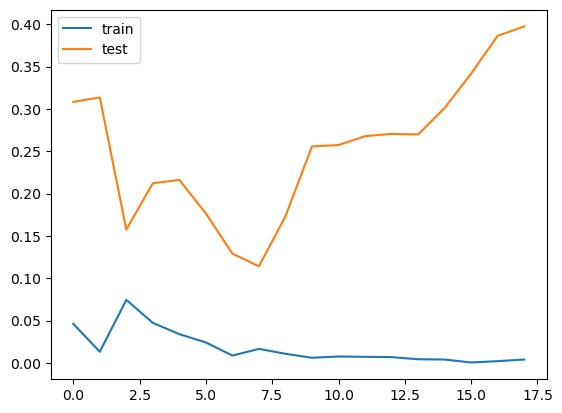

In [39]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()